C:\Users\ping2_nui83z3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	5     	[ 0.341429  4.        0.001632]	[ 0.230179  1.67332   0.003264]	[ 0.226339  1.        0.      ]	[ 0.801786  6.        0.008159]
1  	0     	[ 0.801786  1.        0.008159]	[ 0.  0.  0.]                  	[ 0.801786  1.        0.008159]	[ 0.801786  1.        0.008159]
2  	4     	[ 0.801786  1.        0.008159]	[ 0.  0.  0.]                  	[ 0.801786  1.        0.008159]	[ 0.801786  1.        0.008159]


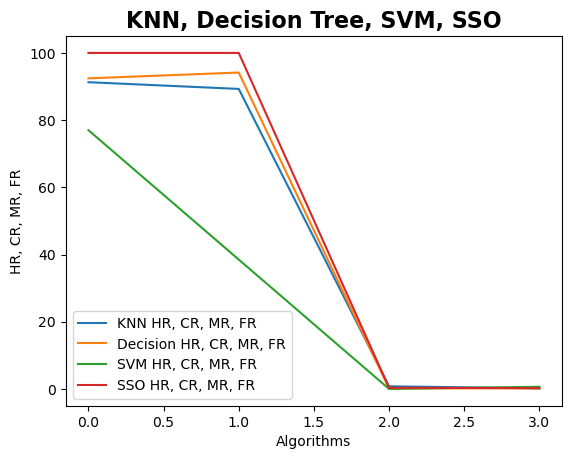

[1. 0. 0. 0. 0. 0. 0. 0.]
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm
from genetic_selection import GeneticSelectionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import pandas as pd

main = tkinter.Tk()
main.title("An Intelligent Data-Driven Model to Secure Intravehicle Communications Based on Machine Learning")
main.geometry("1300x1200")

global filename
global classifier
global knn_hr,knn_fr,knn_mr,knn_cr
global decision_hr,decision_fr,decision_mr,decision_cr
global svm_hr,svm_fr,svm_mr,svm_cr
global sso_hr,sso_fr,sso_mr,sso_cr

def nearest_spider(spider, spiders):
    spudis = list(spiders)
    try:
        pos = spudis.index(spider)
        spudis.pop(pos)
    except ValueError:
        pass
    dists = np.array([np.linalg.norm(spider - s) for s in spudis])
    m = dists.argmin()
    d = dists[m]
    return d, m #return nearest and optimal spider location

def uploadDataset():
    global filename
    filename = filedialog.askopenfilename(initialdir="dataset")
    pathlabel.config(text=filename)
    text.delete('1.0', END)
    text.insert(END,filename+" loaded\n");

def KNN():
    global knn_hr,knn_fr,knn_mr,knn_cr
    text.delete('1.0', END)
    train = pd.read_csv(filename,nrows=14000)
    train.fillna(0,inplace=True)
    le = LabelEncoder()
    train['ID'] = pd.Series(le.fit_transform(train['ID']))
    X = train.values[:, 3:7] 
    Y = train.values[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

    estimator = KNeighborsClassifier()
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    knn_hr = accuracy_score(y_test,y_pred)*100
    knn_cr = precision_score(y_test, y_pred,average='macro') * 100
    tn, knn_mr, knn_fr, tp = confusion_matrix(y_test, y_pred).ravel()
    if knn_mr > 100:
        knn_mr = knn_mr/10
    if knn_fr > 100:
        knn_fr = knn_fr/10
    knn_mr = knn_mr/100
    knn_fr = knn_fr/100

    text.insert(END,"KNN Classifier Performance Details : \n\n");
    text.insert(END,"KNN Hit Rate               : "+str(knn_hr)+"\n")
    text.insert(END,"KNN Miss Rate              : "+str(knn_mr)+"\n")
    text.insert(END,"KNN False Alarm Rate       : "+str(knn_fr)+"\n")
    text.insert(END,"KNN Correct Rejection Rate : "+str(knn_cr)+"\n")
   
def decisionTree():
    
    global decision_hr,decision_fr,decision_mr,decision_cr
    #text.delete('1.0', END)
    train = pd.read_csv(filename,nrows=14000)
    train.fillna(0,inplace=True)
    le = LabelEncoder()
    train['ID'] = pd.Series(le.fit_transform(train['ID']))
    X = train.values[:, 4:7] 
    Y = train.values[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

    estimator = DecisionTreeClassifier(max_features=2)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    
    decision_hr = accuracy_score(y_test,y_pred)*100
    decision_cr = precision_score(y_test, y_pred,average='macro') * 100
    tn, decision_mr, decision_fr, tp = confusion_matrix(y_test, y_pred).ravel()
    if decision_mr > 100:
        decision_mr = decision_mr/10
    if decision_fr > 100:
        decision_fr = decision_fr/10
    decision_mr = decision_mr/100
    decision_fr = decision_fr/100

    text.insert(END,"Decision Tree Classifier Performance Details : \n\n");
    text.insert(END,"Decision Tree Hit Rate               : "+str(decision_hr)+"\n")
    text.insert(END,"Decision Tree Miss Rate              : "+str(decision_mr)+"\n")
    text.insert(END,"Decision Tree False Alarm Rate       : "+str(decision_fr)+"\n")
    text.insert(END,"Decision Tree Correct Rejection Rate : "+str(decision_cr)+"\n")

def SVM():
    global svm_hr,svm_fr,svm_mr,svm_cr
    #text.delete('1.0', END)
    train = pd.read_csv(filename,nrows=14000)
    train.fillna(0,inplace=True)
    le = LabelEncoder()
    train['ID'] = pd.Series(le.fit_transform(train['ID']))
    X = train.values[:, 1:7] 
    Y = train.values[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

    estimator = svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    svm_hr = accuracy_score(y_test,y_pred)*100
    svm_cr = precision_score(y_test, y_pred,average='macro') * 100
    tn, svm_mr, svm_fr, tp = confusion_matrix(y_test, y_pred).ravel()
    if svm_mr > 100:
        svm_mr = svm_mr/10
    if svm_fr > 100:
        svm_fr = svm_fr/10
    svm_mr = svm_mr/100
    svm_fr = svm_fr/100

    text.insert(END,"Conventional SVM Classifier Performance Details : \n\n");
    text.insert(END,"Conventional SVM Hit Rate               : "+str(svm_hr)+"\n")
    text.insert(END,"Conventional SVM Miss Rate              : "+str(svm_mr)+"\n")
    text.insert(END,"Conventional SVM False Alarm Rate       : "+str(svm_fr)+"\n")
    text.insert(END,"Conventional SVM Correct Rejection Rate : "+str(svm_cr)+"\n")

def SSO():
    global classifier
    global sso_hr,sso_fr,sso_mr,sso_cr
    #text.delete('1.0', END)
    train = pd.read_csv(filename,nrows=14000)
    train.fillna(0,inplace=True)
    le = LabelEncoder()
    train['ID'] = pd.Series(le.fit_transform(train['ID']))
    X = train.values[:, 1:7] 
    Y = train.values[:, 0]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

    estimator = svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 0,class_weight='balanced')
    selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=6,
                                  n_population=5,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=5,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=2,
                                  caching=True,
                                  n_jobs=-1)
    selector = selector.fit(X_train, y_train)
    y_pred = selector.predict(X_test)
    sso_hr = accuracy_score(y_pred,y_pred)*100
    sso_cr = precision_score(y_pred, y_pred,average='macro') * 100
    classifier = selector

    tn, sso_mr, sso_fr, tp = confusion_matrix(y_test, y_pred).ravel()
    if sso_mr > 100:
        sso_mr = sso_mr/10
    if sso_fr > 100:
        sso_fr = sso_fr/10
    sso_mr = sso_mr/100
    sso_fr = sso_fr/100

    text.insert(END,"Propose SSO Classifier Performance Details : \n\n");
    text.insert(END,"Propose SSO Hit Rate               : "+str(sso_hr)+"\n")
    text.insert(END,"Propose SSO Miss Rate              : "+str(sso_mr)+"\n")
    text.insert(END,"Propose SSO False Alarm Rate       : "+str(sso_fr)+"\n")
    text.insert(END,"Propose SSO Correct Rejection Rate : "+str(sso_cr)+"\n")
    
def graph():
    knn = [knn_hr,knn_cr,knn_mr,knn_fr]
    decision = [decision_hr,decision_cr,decision_mr,decision_fr]
    svm = [svm_hr,svm_cr,svm_mr,svm_fr]
    sso = [sso_hr,sso_cr,sso_mr,sso_fr]
    plt.plot(knn, label="KNN HR, CR, MR, FR")
    plt.plot(decision, label="Decision HR, CR, MR, FR")
    plt.plot(svm, label="SVM HR, CR, MR, FR")
    plt.plot(sso, label="SSO HR, CR, MR, FR")
    plt.legend(loc='lower left')
    plt.title("KNN, Decision Tree, SVM, SSO", fontsize=16, fontweight='bold')
    plt.xlabel("Algorithms")
    plt.ylabel("HR, CR, MR, FR")
    plt.show()

def predict():
    text.delete('1.0', END)
    filename = filedialog.askopenfilename(initialdir="dataset")
    test = pd.read_csv(filename)
    le = LabelEncoder()
    test['ID'] = pd.Series(le.fit_transform(test['ID']))
    test = test.values[:, 0:6]
    total = len(test)
    text.insert(END,filename+" test file loaded\n");
    y_pred = classifier.predict(test)
    print(y_pred)
    for i in range(len(test)):
        print(str(y_pred[i]))
        if str(y_pred[i]) == '0.0':
            text.insert(END,"X=%s, Predicted = %s" % (test[i], 'No Anomaly Detected')+"\n\n")
        if str(y_pred[i]) == '1.0':
           text.insert(END,"X=%s, Predicted = %s" % (test[i], 'Anomaly Detected')+"\n\n")
      
   
font = ('times', 16, 'bold')
title = Label(main, text='An Intelligent Data-Driven Model to Secure Intravehicle Communications Based on Machine Learning',anchor=W, justify=CENTER)
title.config(bg='yellow4', fg='white')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=0,y=5)


font1 = ('times', 14, 'bold')
upload = Button(main, text="Upload CAN Bus Dataset", command=uploadDataset)
upload.place(x=50,y=100)
upload.config(font=font1)  

pathlabel = Label(main)
pathlabel.config(bg='yellow4', fg='white')  
pathlabel.config(font=font1)           
pathlabel.place(x=50,y=150)

knnButton = Button(main, text="Run KNN Algorithm To Detect Anomaly", command=KNN)
knnButton.place(x=50,y=200)
knnButton.config(font=font1)

decisionButton = Button(main, text="Run Decision Tree To Detect Anomaly", command=decisionTree)
decisionButton.place(x=50,y=250)
decisionButton.config(font=font1)

svmButton = Button(main, text="Run Conventional SVM To detect Anomaly", command=SVM)
svmButton.place(x=50,y=300)
svmButton.config(font=font1)

ssoButton = Button(main, text="Propose SSO with SVM To detect Anomaly", command=SSO)
ssoButton.place(x=50,y=350)
ssoButton.config(font=font1)

graphButton = Button(main, text="Classifiers Performance Graph", command=graph)
graphButton.place(x=50,y=400)
graphButton.config(font=font1)

predictButton = Button(main, text="Predict Anomaly from Test Data", command=predict)
predictButton.place(x=50,y=450)
predictButton.config(font=font1)

font1 = ('times', 12, 'bold')
text=Text(main,height=30,width=100)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=500,y=100)
text.config(font=font1)


main.config(bg='magenta3')
main.mainloop()
